# 

# Investigation into Loans and Credit Rating

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sweetviz as sv
from ydata_profiling import ProfileReport

In [2]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### Loading Data(csv)

In [14]:
df = pd.read_csv('Loan_approval_data_2025.csv')
df.describe()

,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,34.957060,7.454868,50062.892040,643.614820,8.168274,3595.619400,14290.442220,0.053480,0.55464,0.147640,33041.874000,15.498591,0.285724,0.701999,0.233995,0.550460
std,11.118603,7.612097,32630.501014,64.731518,7.207552,13232.399398,13243.757493,0.224991,0.84505,0.412996,26116.185102,4.067942,0.159787,0.465788,0.155268,0.497452
min,18.000000,0.000000,15000.000000,348.000000,0.000000,0.000000,60.000000,0.000000,0.00000,0.000000,500.000000,6.000000,0.002000,0.008000,0.003000,0.000000
25%,26.000000,1.300000,27280.500000,600.000000,2.000000,130.000000,5581.000000,0.000000,0.00000,0.000000,12300.000000,12.180000,0.161000,0.333000,0.111000,0.000000
50%,35.000000,4.900000,41607.500000,643.000000,6.100000,568.000000,10385.000000,0.000000,0.00000,0.000000,26100.000000,15.440000,0.265000,0.622000,0.207000,1.000000
75%,43.000000,11.400000,62723.250000,687.000000,12.600000,2271.000000,18449.250000,0.000000,1.00000,0.000000,48500.000000,18.870000,0.389000,1.010250,0.337000,1.000000
max,70.000000,39.900000,250000.000000,850.000000,30.000000,300000.000000,163344.000000,1.000000,9.00000,4.000000,100000.000000,23.000000,0.800000,2.001000,0.667000,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              50000 non-null  object 
 1   age                      50000 non-null  int64  
 2   occupation_status        50000 non-null  object 
 3   years_employed           50000 non-null  float64
 4   annual_income            50000 non-null  int64  
 5   credit_score             50000 non-null  int64  
 6   credit_history_years     50000 non-null  float64
 7   savings_assets           50000 non-null  int64  
 8   current_debt             50000 non-null  int64  
 9   defaults_on_file         50000 non-null  int64  
 10  delinquencies_last_2yrs  50000 non-null  int64  
 11  derogatory_marks         50000 non-null  int64  
 12  product_type             50000 non-null  object 
 13  loan_intent              50000 non-null  object 
 14  loan_amount           

## Brainthoughts
Target variable is 'loan_status' therfore I have to compare it to every other column


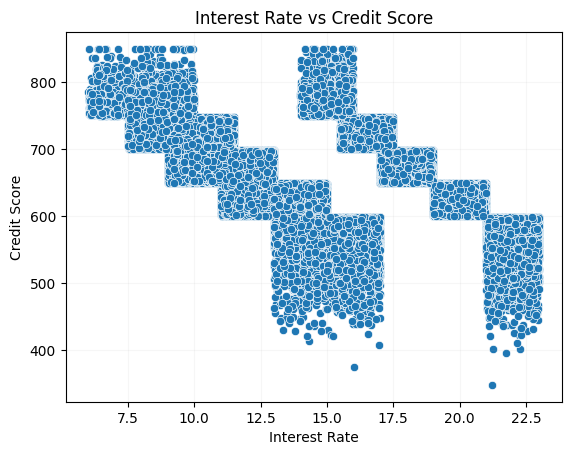

In [9]:
sns.scatterplot(data=df, x="interest_rate", y="credit_score")

plt.title("Interest Rate vs Credit Score")
plt.xlabel("Interest Rate")
plt.ylabel("Credit Score")
plt.grid(True, alpha=0.1)
plt.show()

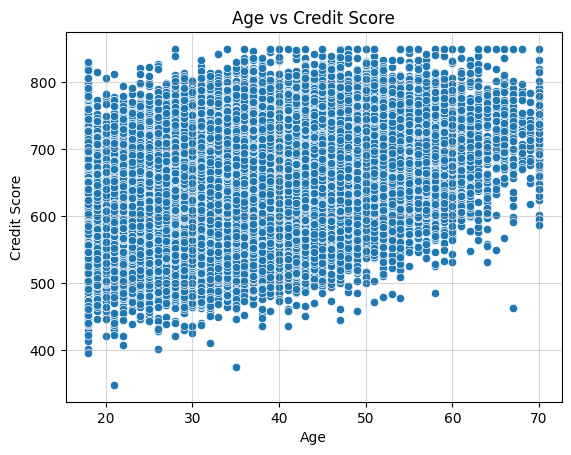

In [11]:
sns.scatterplot(data=df, x="age", y="credit_score")

plt.title("Age vs Credit Score")
plt.xlabel("Age")
plt.ylabel("Credit Score")
plt.grid(True, alpha=0.5)
plt.show()

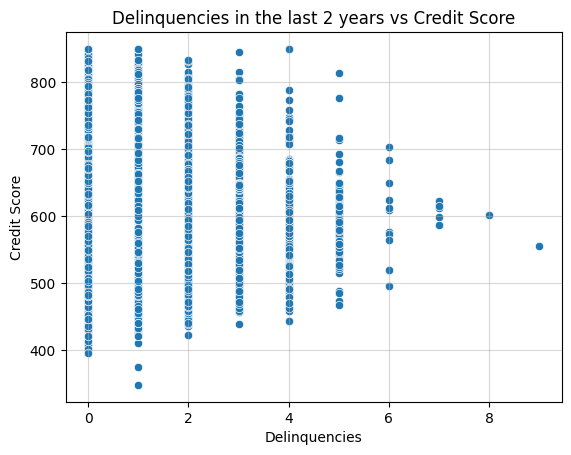

In [13]:
sns.scatterplot(data=df, x="delinquencies_last_2yrs", y="credit_score")

plt.title("Delinquencies in the last 2 years vs Credit Score")
plt.xlabel("Delinquencies")
plt.ylabel("Credit Score")
plt.grid(True, alpha=0.5)
plt.show()

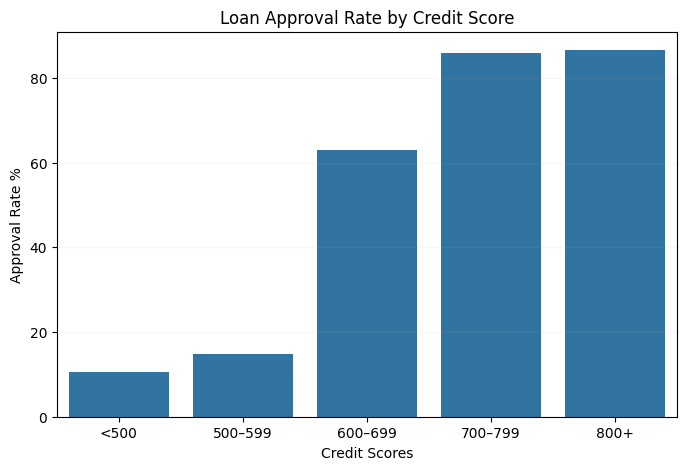

In [23]:
plt.figure(figsize=(8, 5))

bins = [0, 500, 600, 700, 800, 900]
labels = ["<500", "500–599", "600–699", "700–799", "800+"]


df["credit_score_bucket"] = pd.cut(df["credit_score"], 
                                   bins=bins, 
                                   labels=labels, 
                                   include_lowest=True)

approval_rate = df.groupby("credit_score_bucket")["loan_status"].mean() * 100

sns.barplot(x = approval_rate.index, y = approval_rate.values)

plt.title("Loan Approval Rate by Credit Score")
plt.xlabel("Credit Scores")
plt.ylabel("Approval Rate %")

plt.grid(True, axis='y', alpha=0.1)

plt.show()

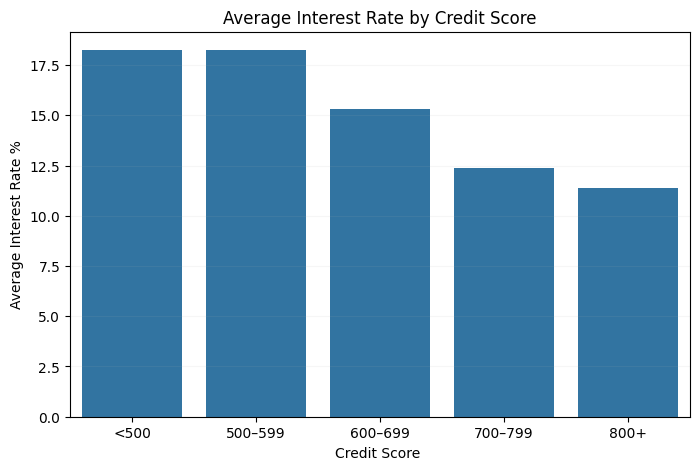

In [25]:
plt.figure(figsize=(8, 5))

interest_rate_by_bucket = df.groupby("credit_score_bucket")["interest_rate"].mean()

sns.barplot(x=interest_rate_by_bucket.index, y=interest_rate_by_bucket.values)

plt.title("Average Interest Rate by Credit Score")
plt.xlabel("Credit Score ")
plt.ylabel("Average Interest Rate %")
plt.grid(True, axis='y', alpha=0.1)

plt.show()